<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/Cleaning_Covid_Death_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('COVID-19_Death_Counts.csv')
df.head()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/03/2024,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,0.0,60170.0,98.0,4111.0,0.0,434.0,4545.0,NaN
1,10/03/2024,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0,NaN
2,10/03/2024,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,2.0,59362.0,98.0,4066.0,2.0,468.0,4534.0,NaN
3,10/03/2024,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,3.0,59162.0,99.0,3915.0,0.0,500.0,4418.0,NaN
4,10/03/2024,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58834.0,99.0,3818.0,0.0,481.0,4299.0,NaN


In [18]:
print(df.shape)
print(df.describe())

(16794, 17)
             Month     MMWR Week  COVID-19 Deaths  Total Deaths  \
count  3078.000000  13392.000000     1.377100e+04  1.679300e+04   
mean      6.263158     25.584677     7.030020e+02  7.400347e+03   
std       3.374995     14.747642     1.216949e+04  1.343265e+05   
min       1.000000      1.000000     0.000000e+00  1.200000e+01   
25%       3.000000     13.000000     2.300000e+01  4.900000e+02   
50%       6.000000     25.000000     5.700000e+01  1.082000e+03   
75%       9.000000     38.000000     1.800000e+02  2.255000e+03   
max      12.000000     53.000000     1.208368e+06  1.544822e+07   

       Percent of Expected Deaths  Pneumonia Deaths  \
count                16740.000000      1.566600e+04   
mean                   114.397133      6.973944e+02   
std                     18.320154      1.237954e+04   
min                      1.000000      0.000000e+00   
25%                    105.000000      4.100000e+01   
50%                    112.000000      8.400000e+01   

In [19]:
#Data initialy had two rows that were messing with the rest of the data set.
#Resolved this manually in the terminal and editing the file, and then reuploading it
#This line of code confirms that the column names are now correct
column_names = df.columns
print(column_names)

Index(['Data as of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week Ending Date', 'State', 'COVID-19 Deaths',
       'Total Deaths', 'Percent of Expected Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')


In [20]:
df['State'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

In [21]:
#Delete all rows in which the state variable is not named "United States"
df = df[df['State'] == 'United States']
df.head()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/03/2024,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,0.0,60170.0,98.0,4111.0,0.0,434.0,4545.0,NaN
1,10/03/2024,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0,NaN
2,10/03/2024,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,2.0,59362.0,98.0,4066.0,2.0,468.0,4534.0,NaN
3,10/03/2024,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,3.0,59162.0,99.0,3915.0,0.0,500.0,4418.0,NaN
4,10/03/2024,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58834.0,99.0,3818.0,0.0,481.0,4299.0,NaN


In [23]:
print(df.shape)
print(df.describe())

(311, 17)
           Month   MMWR Week  COVID-19 Deaths  Total Deaths  \
count  57.000000  248.000000     3.110000e+02  3.110000e+02   
mean    6.263158   25.584677     1.554171e+04  1.987719e+05   
std     3.404442   14.776914     7.807329e+04  9.510589e+05   
min     1.000000    1.000000     0.000000e+00  2.324800e+04   
25%     3.000000   13.000000     1.411000e+03  5.848950e+04   
50%     6.000000   25.000000     3.246000e+03  6.186700e+04   
75%     9.000000   38.000000     9.633000e+03  7.738200e+04   
max    12.000000   53.000000     1.208368e+06  1.544822e+07   

       Percent of Expected Deaths  Pneumonia Deaths  \
count                  310.000000      3.110000e+02   
mean                   114.341935      1.743306e+04   
std                     12.145791      8.449426e+04   
min                     45.000000      1.303000e+03   
25%                    108.000000      3.611500e+03   
50%                    111.000000      4.890000e+03   
75%                    119.000000    

In [24]:
#Ensuring that there is only one unique value, United States, within the state variable.
unique_states_count = df['State'].nunique()
print(unique_states_count)

1


In [25]:
#Taking out unnessary columns to make the data set smaller, and renaming MMWR Week to just Week for clarity
df = df[['Start Date', 'End Date', 'Group', 'Year', 'MMWR Week', 'State', 'COVID-19 Deaths' ]]
df.rename(columns={'MMWR Week': 'Week'}, inplace=True)
df.head()

<ipython-input-25-6d552c9e3bc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'MMWR Week': 'Week'}, inplace=True)


,Start Date,End Date,Group,Year,Week,State,COVID-19 Deaths
0,12/29/2019,01/04/2020,By Week,2019/2020,1.0,United States,0.0
1,01/05/2020,01/11/2020,By Week,2020,2.0,United States,1.0
2,01/12/2020,01/18/2020,By Week,2020,3.0,United States,2.0
3,01/19/2020,01/25/2020,By Week,2020,4.0,United States,3.0
4,01/26/2020,02/01/2020,By Week,2020,5.0,United States,0.0


In [28]:
# How many missing values are in clean data for week variable?
df['Week'].isna().sum()

63

EDA; making histograms for each years weekly Covid-19 deaths.

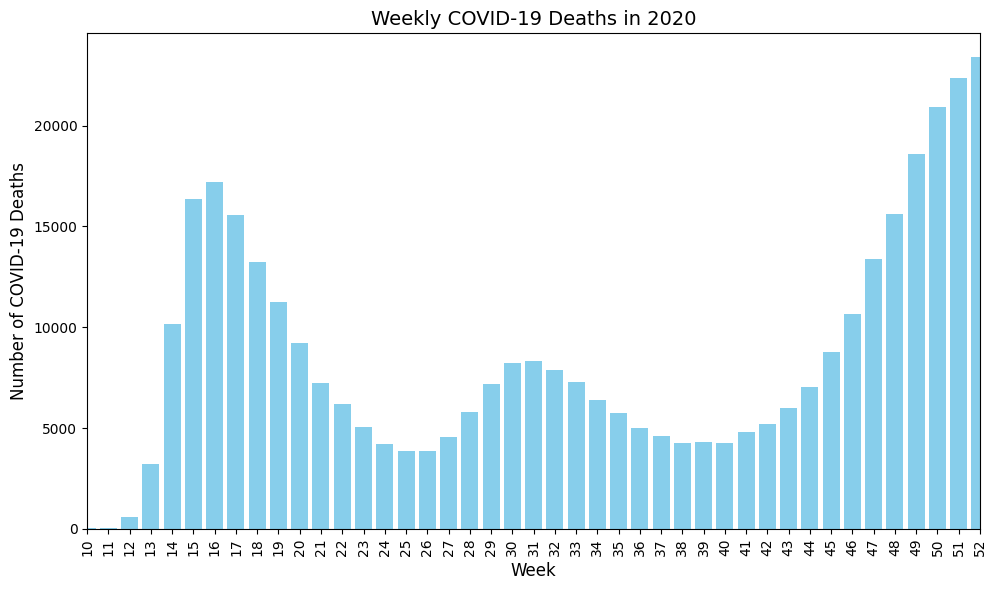

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the year 2020
df_2020 = df[(df['Year'] == '2020') | (df['Year'] == ('2019/2020'))]
weekly_deaths = df_2020.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='skyblue')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2020', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)
# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.xlim([10, 52]) # Including ranges where there were at least 1 death
plt.show()

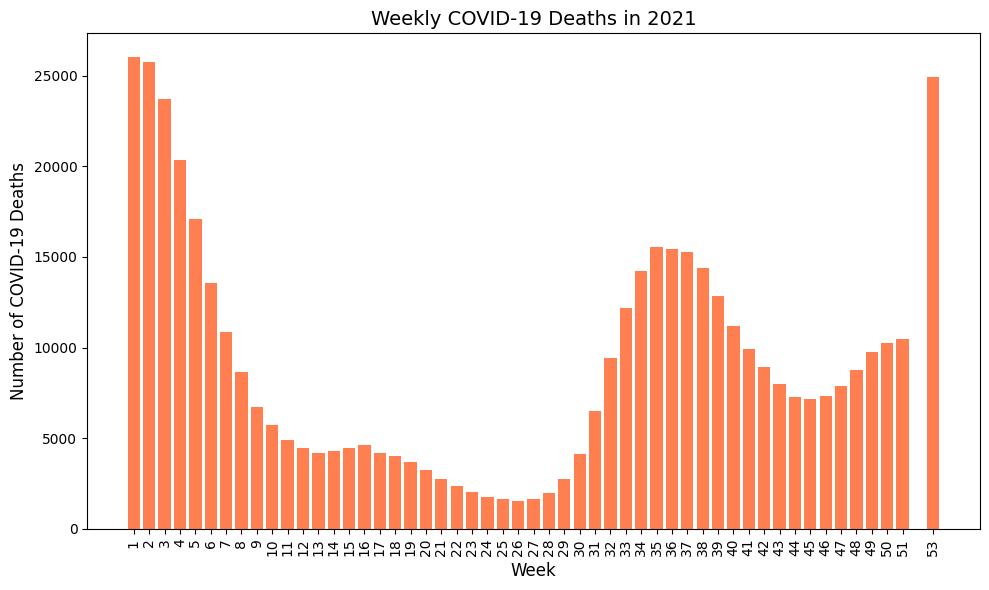

In [ ]:
# Filter the data for the year 2021
df_2021 = df[(df['Year'] == '2021') | (df['Year'] == ('2020/2021'))]
weekly_deaths = df_2021.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='coral')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2021', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

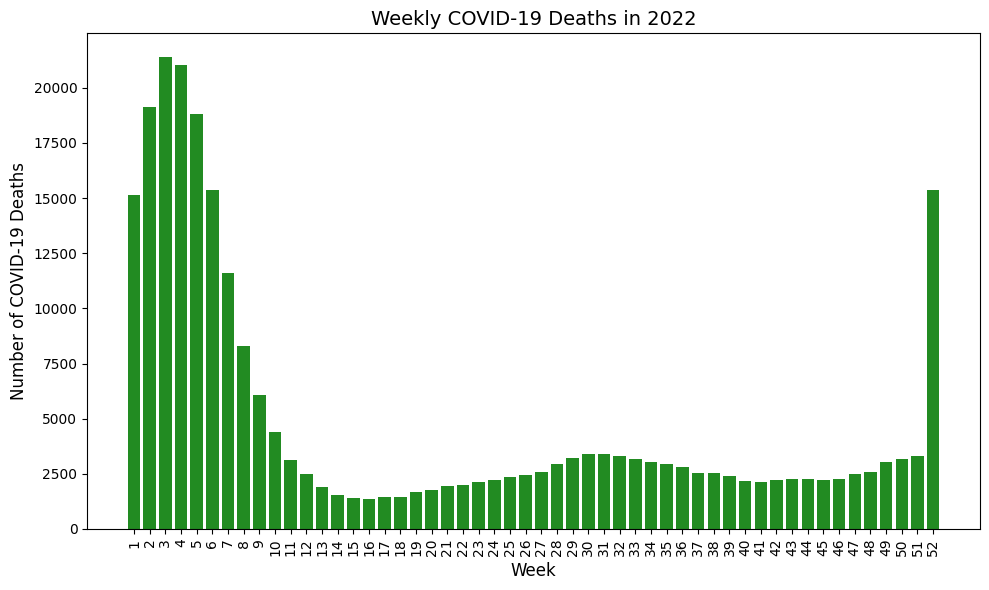

In [ ]:
# Filter the data for the year 2022
df_2022 = df[(df['Year'] == '2022') | (df['Year'] == ('2021/2022'))]
weekly_deaths = df_2022.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='forestgreen')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2022', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

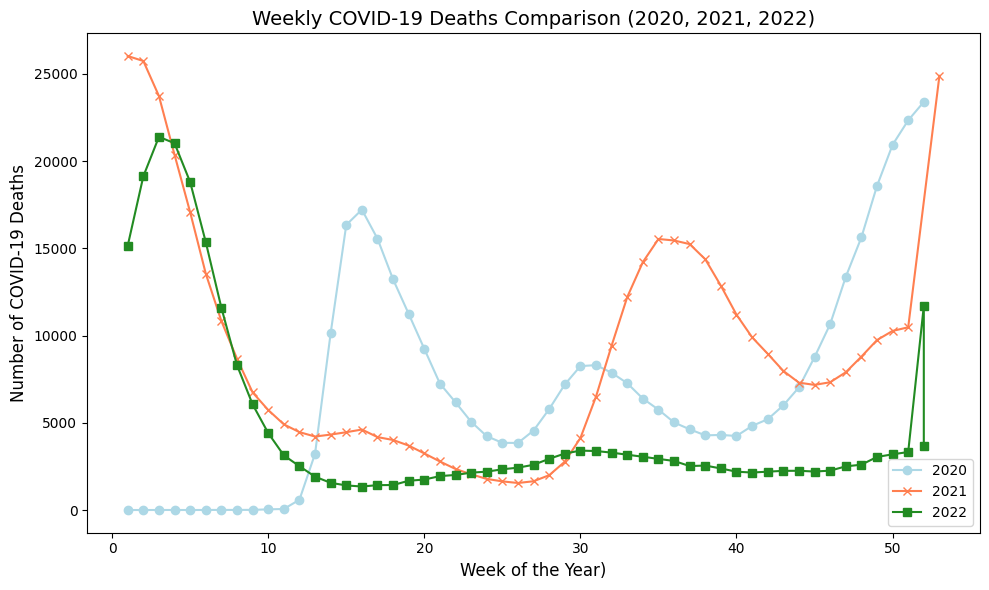

In [ ]:
#line graph comparing weekly death rates accross three years; 2020, 2021, and 2022
import pandas as pd
import matplotlib.pyplot as plt

# Sort each DataFrame by 'MMWR' to ensure proper plotting
df_2020 = df_2020.sort_values('Week')
df_2021 = df_2021.sort_values('Week')
df_2022 = df_2022.sort_values('Week')

# Plotting the data for 2020, 2021, and 2022
plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(df_2020['Week'], df_2020['COVID-19 Deaths'], label='2020', color='lightblue', linestyle='-', marker='o')

# Plot for 2021
plt.plot(df_2021['Week'], df_2021['COVID-19 Deaths'], label='2021', color='coral', linestyle='-', marker='x')

# Plot for 2022
plt.plot(df_2022['Week'], df_2022['COVID-19 Deaths'], label='2022', color='forestgreen', linestyle='-', marker='s')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths Comparison (2020, 2021, 2022)', fontsize=14)
plt.xlabel('Week of the Year)', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


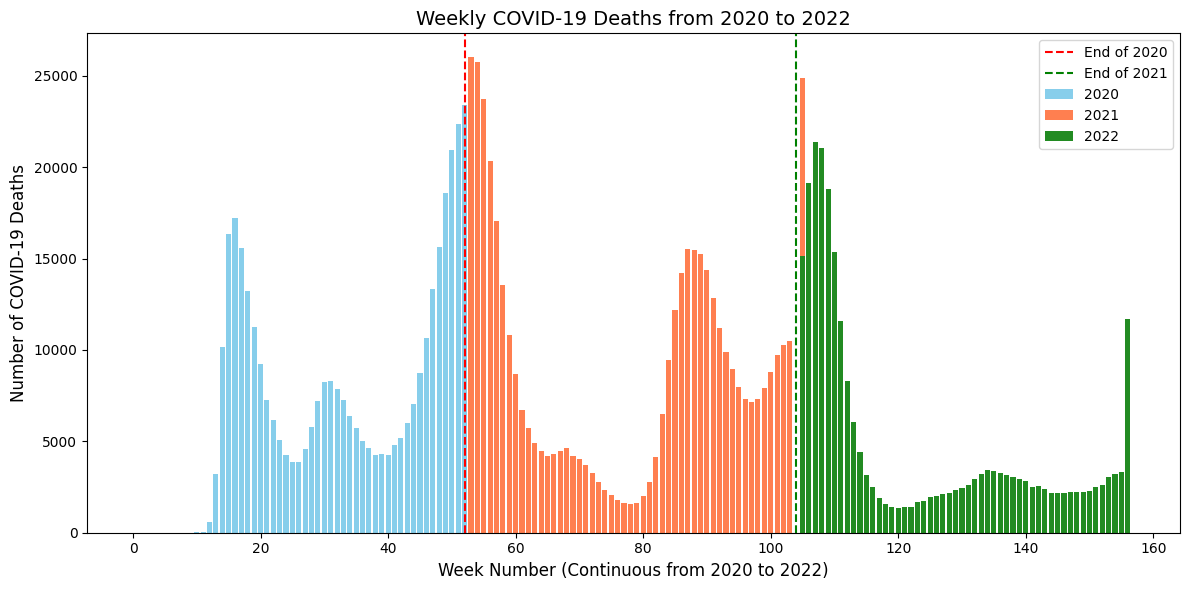

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_2020, df_2021, df_2022 are your cleaned DataFrames with columns 'MMWR' and 'COVID-19 Deaths'

# Add a 'Year' column to each DataFrame for clarity in the plot
df_2020['Year'] = 2020
df_2021['Year'] = 2021
df_2022['Year'] = 2022

# Concatenate the data for all three years
df_all = pd.concat([df_2020, df_2021, df_2022])

# Sort the combined DataFrame by 'Year' and 'MMWR'
df_all = df_all.sort_values(by=['Year', 'Week'])

# Create a continuous 'Week_Number' for plotting (52 weeks for each year)
# This ensures that weeks for 2021 and 2022 flow sequentially
df_all['Week_Number'] = df_all['Week'] + (df_all['Year'] - 2020) * 52

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the data for 2020
plt.bar(df_all[df_all['Year'] == 2020]['Week_Number'],
        df_all[df_all['Year'] == 2020]['COVID-19 Deaths'],
        color='skyblue', label='2020')

# Plot the data for 2021
plt.bar(df_all[df_all['Year'] == 2021]['Week_Number'],
        df_all[df_all['Year'] == 2021]['COVID-19 Deaths'],
        color='coral', label='2021')

# Plot the data for 2022
plt.bar(df_all[df_all['Year'] == 2022]['Week_Number'],
        df_all[df_all['Year'] == 2022]['COVID-19 Deaths'],
        color='forestgreen', label='2022')

# Add vertical lines to indicate year changes
plt.axvline(x=52, color='red', linestyle='--', label='End of 2020')
plt.axvline(x=104, color='green', linestyle='--', label='End of 2021')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths from 2020 to 2022', fontsize=14)
plt.xlabel('Week Number (Continuous from 2020 to 2022)', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

